<a href="https://colab.research.google.com/github/danchaud-vincent/tensorflow-deep-learning/blob/main/exercices-solutions/03_Computer_Vision_and_Neural_Network_Exercices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Computer Vision and Neural Networks Exercices

Take a dataset on kaggle (ex: cat vs dog) and Build a CNN image classifier using the techniques we've built in the course notebook. 

Find an ideal learning rate for a simple convolutional neural network model on the dataset.

In [1]:
# Importing the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive

## 1. GET THE DATASET

I have download an image classifier dataset of cats and dogs from kaggle on the following webpage [cat and dog](https://www.kaggle.com/datasets/tongpython/cat-and-dog?select=test_set).

### 1.1 UNZIP the file

In [3]:
# read data from the google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# unzip the downloaded file
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/MACHINE_LEARNING/DATASET/cat_vs_dog.zip","r")
zip_ref.extractall()
zip_ref.close()

### 1.2. INSPECT THE DATASET

In [ ]:
ls "cat_vs_dog"

test/  train/


We can see the folder of the dataset get a test and a train folder

In [ ]:
ls "cat_vs_dog/test/"

cat/  dog/


In [ ]:
ls "cat_vs_dog/test/dog/"

 dog.4001.jpg       dog.4251.jpg       dog.4503.jpg       dog.4754.jpg
 dog.4002.jpg       dog.4252.jpg       dog.4504.jpg       dog.4755.jpg
 dog.4003.jpg       dog.4253.jpg       dog.4505.jpg       dog.4756.jpg
 dog.4004.jpg       dog.4254.jpg       dog.4506.jpg       dog.4757.jpg
 dog.4005.jpg       dog.4255.jpg       dog.4507.jpg       dog.4758.jpg
 dog.4006.jpg       dog.4256.jpg       dog.4508.jpg       dog.4759.jpg
 dog.4007.jpg       dog.4257.jpg       dog.4509.jpg       dog.4760.jpg
 dog.4008.jpg       dog.4258.jpg       dog.4510.jpg       dog.4761.jpg
 dog.4009.jpg       dog.4259.jpg       dog.4511.jpg       dog.4762.jpg
 dog.4010.jpg       dog.4260.jpg       dog.4512.jpg       dog.4763.jpg
 dog.4011.jpg       dog.4261.jpg       dog.4513.jpg       dog.4764.jpg
 dog.4012.jpg       dog.4262.jpg       dog.4514.jpg       dog.4765.jpg
 dog.4013.jpg       dog.4263.jpg       dog.4515.jpg       dog.4766.jpg
 dog.4014.jpg       dog.4264.jpg       dog.4516.jpg       dog.4767.jpg
 dog.4

In [5]:
# walk through cat_vs_dog directory 
import os
for dirpath, dirnames, filenames in os.walk("cat_vs_dog"):
  print(f"{dirpath} has {len(dirnames)} folders and {len(filenames)} files")

cat_vs_dog has 2 folders and 0 files
cat_vs_dog/train has 2 folders and 0 files
cat_vs_dog/train/cat has 0 folders and 4001 files
cat_vs_dog/train/dog has 0 folders and 4006 files
cat_vs_dog/test has 2 folders and 0 files
cat_vs_dog/test/cat has 0 folders and 1012 files
cat_vs_dog/test/dog has 0 folders and 1013 files


In [6]:
# Get the class names
import pathlib

data_dir = pathlib.Path("cat_vs_dog/train")
class_names = sorted([item.name for item in data_dir.glob("*")])
class_names

['cat', 'dog']

### 1.3 Visualize the data

In [7]:
# libraries
import matplotlib.image as mpimg
import random

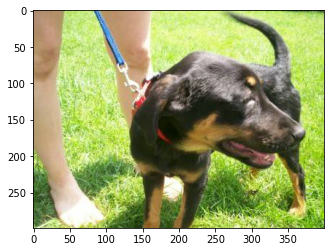

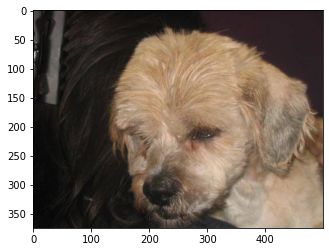

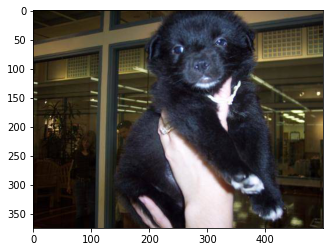

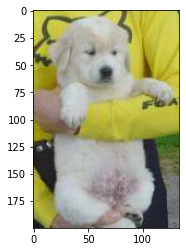

In [ ]:
# plot some random images
dirname = "cat_vs_dog"
folder_name = "train"
class_name = "dog"

# select random images
random_images = random.sample(os.listdir(f"{dirname}/{folder_name}/{class_name}"),4)

for image in random_images:
 
  img = mpimg.imread(f"{dirname}/{folder_name}/{class_name}/{image}")
  plt.figure()
  plt.imshow(img)
  plt.show()

In [8]:
# build a function to visualize random image
def plot_random_images(target_dir, target_class, num_images):
  """
  Plot random images of a target class

  Arguments:
  - targer_dir (str): name of the directory 
  - target_class (str): name of the class of the images
  - num_images (int): number of images to plot
  """

  # create path 
  path = f"{target_dir}/{target_class}"

  # select random images
  random_images = random.sample(os.listdir(path),num_images)

  # plot the images
  for i, image in enumerate(random_images):

    # read the image
    img = mpimg.imread(path+"/"+image)

    # shape of the image
    shape_img = img.shape

    # create a figure
    plt.figure()
    plt.imshow(img)
    plt.title(f"Image {i} | Shape : {shape_img}")
    plt.show()


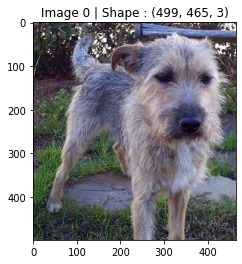

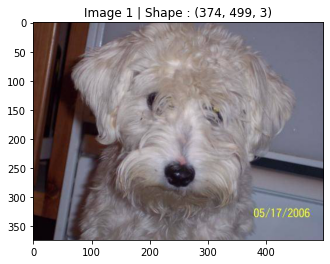

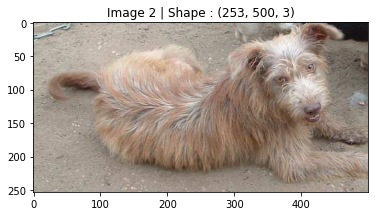

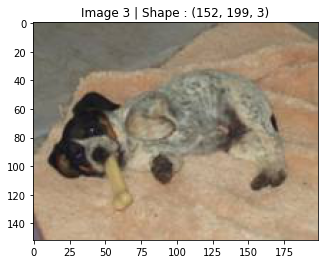

In [ ]:
# visualize some images of dog
plot_random_images("cat_vs_dog/train","dog",4)

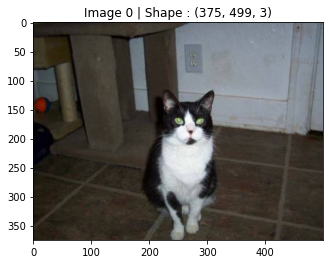

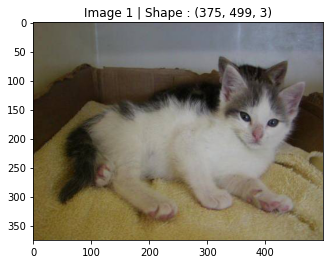

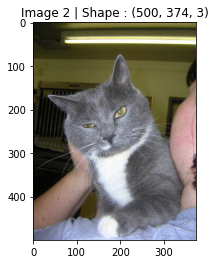

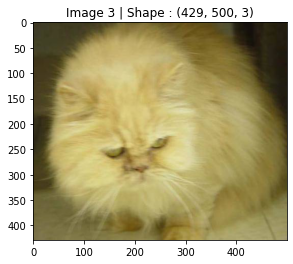

In [ ]:
# visualize some images of cats
plot_random_images("cat_vs_dog/train","cat",4)

In [ ]:
# Get max and min of an image
random_image = random.sample(os.listdir(f"cat_vs_dog/train/dog"),1)
img = mpimg.imread(f"cat_vs_dog/train/dog/{random_image[0]}")

print("Max of the image:", np.max(img))
print("Min of the image:", np.min(img))

Max of the image: 255
Min of the image: 0


# 2. Build a CNN classifier

In [9]:
# import tensorflow libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense

## 2.1 Model 1





### 2.1.1 Preprocess the data

In [ ]:
# Define the directories paths
train_dir = "cat_vs_dog/train/"
test_dir = "cat_vs_dog/test/"

In [ ]:
# Create train and test data generators (rescale the data)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               class_mode="binary",
                                               batch_size=32,
                                               target_size=(224,224))

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             class_mode="binary",
                                             batch_size=32,
                                             target_size=(224,224))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
# get a sample of a train data batch
images, labels = train_data.next()

images.shape, labels

((32, 224, 224, 3),
 array([1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.],
       dtype=float32))

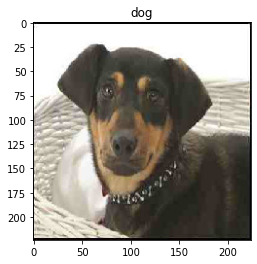

24


In [ ]:
# visualize an image in the batch
index = np.random.randint(len(labels))
class_image = class_names[int(labels[index])]
plt.figure()
plt.imshow(images[index])
plt.title(class_image)
plt.show()

print(index)

### 2.1.2 Create a model

In [ ]:
# create a tiny vgg model
model_1 = tf.keras.Sequential([
    Conv2D(filters=62,kernel_size=3, activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=60, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=62,kernel_size=3, activation="relu"),
    Conv2D(filters=60, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 65s 199ms/step - loss: 0.6924 - accuracy: 0.5544 - val_loss: 0.6860 - val_accuracy: 0.5378
Epoch 2/5
251/251 [==============================] - 47s 188ms/step - loss: 0.6643 - accuracy: 0.6101 - val_loss: 0.6654 - val_accuracy: 0.6085
Epoch 3/5
251/251 [==============================] - 48s 190ms/step - loss: 0.6097 - accuracy: 0.6713 - val_loss: 0.6564 - val_accuracy: 0.6307
Epoch 4/5
251/251 [==============================] - 48s 192ms/step - loss: 0.5311 - accuracy: 0.7345 - val_loss: 0.6016 - val_accuracy: 0.6802
Epoch 5/5
251/251 [==============================] - 49s 193ms/step - loss: 0.4379 - accuracy: 0.7980 - val_loss: 0.6135 - val_accuracy: 0.7138


In [ ]:
# summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 62)      1736      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 60)      33540     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 60)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 62)      33542     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 60)      33540     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 60)       0         
 2D)                                                    

### 2.1.3 Visualize results

In [ ]:
# DataFrame of losses and accuracy
pd.DataFrame(history_1.history)

,loss,accuracy,val_loss,val_accuracy
0,0.692441,0.554403,0.686004,0.537815
1,0.664267,0.610119,0.665373,0.608502
2,0.609686,0.671330,0.656394,0.630746
3,0.531065,0.734541,0.601582,0.680178
4,0.437865,0.798001,0.613536,0.713791


In [10]:
# create a function to plot loss curves
def plot_loss_curves(history):
  """
  Plot the loss curves and the accuracy curves of a trained model

  Arguments:
  - history: history of the trained model
  """

  # convert history into a dataframe
  df = pd.DataFrame(history.history)

  # loss values
  loss_train = df["loss"]
  loss_val = df["val_loss"]

  # accuracy values
  acc_train = df["accuracy"]
  acc_val = df["val_accuracy"]

  # figure
  fig, ax = plt.subplots(1,2,figsize=(10,7))
  
  ax[0].plot(loss_train, label="training loss")
  ax[0].plot(loss_val, label="validation loss")
  ax[0].set_xlabel("epochs")
  ax[0].set_title("Loss")
  ax[0].legend()

  ax[1].plot(acc_train, label="training accuracy")
  ax[1].plot(acc_val, label="validation accuracy")
  ax[1].set_xlabel("epochs")
  ax[1].set_title("Accuracy")
  ax[1].legend()

  plt.show()

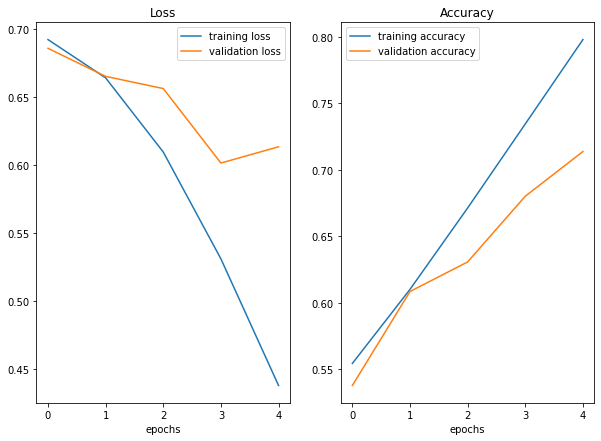

In [ ]:
# loss curves of the first model
plot_loss_curves(history_1)

As we can see our model is learning, however it still need to be improved. We can try to train longer, or use data augmentation.

## 2.2 Model 2 : Data Augmentation

### 2.2.1 Preprocess the data

In [ ]:
# Data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.15,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# load data in from directories and turn it into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode="binary",
                                                                   shuffle=True,
                                                                   batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             shuffle=True,
                                             batch_size=32)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### 2.2.2 Create the model

In [ ]:
# create a second model tiny vgg
model_2 = tf.keras.Sequential([
    Conv2D(filters=62, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=60, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=62,kernel_size=3, activation="relu"),
    Conv2D(filters=60, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model with the augmented data
history_2 = model_2.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 116s 459ms/step - loss: 0.7025 - accuracy: 0.5183 - val_loss: 0.6916 - val_accuracy: 0.4894
Epoch 2/5
251/251 [==============================] - 117s 465ms/step - loss: 0.6935 - accuracy: 0.5118 - val_loss: 0.6900 - val_accuracy: 0.5536
Epoch 3/5
251/251 [==============================] - 114s 454ms/step - loss: 0.6874 - accuracy: 0.5574 - val_loss: 0.6875 - val_accuracy: 0.5250
Epoch 4/5
251/251 [==============================] - 115s 458ms/step - loss: 0.6853 - accuracy: 0.5572 - val_loss: 0.6654 - val_accuracy: 0.5853
Epoch 5/5
251/251 [==============================] - 114s 452ms/step - loss: 0.6789 - accuracy: 0.5764 - val_loss: 0.6712 - val_accuracy: 0.6001


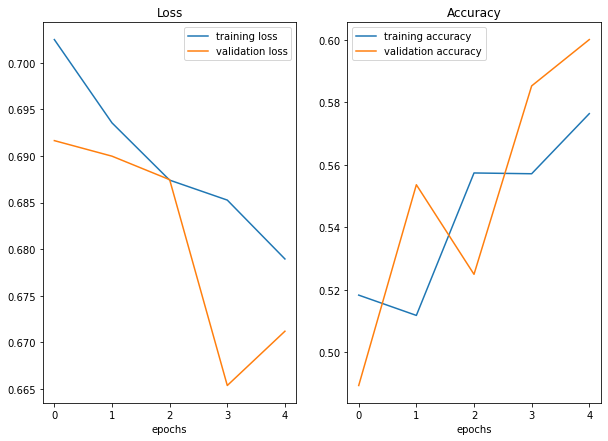

In [ ]:
# loss curves of the first model
plot_loss_curves(history_2)

The loss curves are much closer to each other. Although our model didn't perform as well on the augmented trainin set, it performed much better on the validation set.

## 2.3 Model 3 : Build the CNN Explainer model, and find the best learning rate




Let's try to creat the same model than the model in the CNN Explainer Website. It has the same architecture (tiny vgg) but each layer has less neurons than our previous models. We will try to build a simpliest model by we will train it much longer.

### 2.3.1 Preprocess the data

In [ ]:
# Data Augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             horizontal_flip=True,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             shear_range=0.15,
                                             rotation_range=10)
 
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# load data in from directories and turn it into batches*
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode="binary",
                                                                   batch_size=32,
                                                                   shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32,
                                             shuffle=True)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### 2.3.2 Build the CNN Explainer Model and Find the best learning rate for the model

In [ ]:
# Build the CNN Explainer model
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/4))

# fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[lr_scheduler])

Epoch 1/10
251/251 [==============================] - 128s 507ms/step - loss: 0.6862 - accuracy: 0.5444 - val_loss: 0.6699 - val_accuracy: 0.5843 - lr: 1.0000e-04
Epoch 2/10
251/251 [==============================] - 118s 471ms/step - loss: 0.6629 - accuracy: 0.5931 - val_loss: 0.6339 - val_accuracy: 0.6263 - lr: 1.7783e-04
Epoch 3/10
251/251 [==============================] - 105s 419ms/step - loss: 0.6511 - accuracy: 0.6086 - val_loss: 0.6535 - val_accuracy: 0.6134 - lr: 3.1623e-04
Epoch 4/10
251/251 [==============================] - 103s 412ms/step - loss: 0.6387 - accuracy: 0.6276 - val_loss: 0.6131 - val_accuracy: 0.6535 - lr: 5.6234e-04
Epoch 5/10
251/251 [==============================] - 105s 417ms/step - loss: 0.6496 - accuracy: 0.6200 - val_loss: 0.6465 - val_accuracy: 0.6036 - lr: 0.0010
Epoch 6/10
251/251 [==============================] - 103s 411ms/step - loss: 0.6641 - accuracy: 0.6082 - val_loss: 0.6487 - val_accuracy: 0.6337 - lr: 0.0018
Epoch 7/10
251/251 [==========

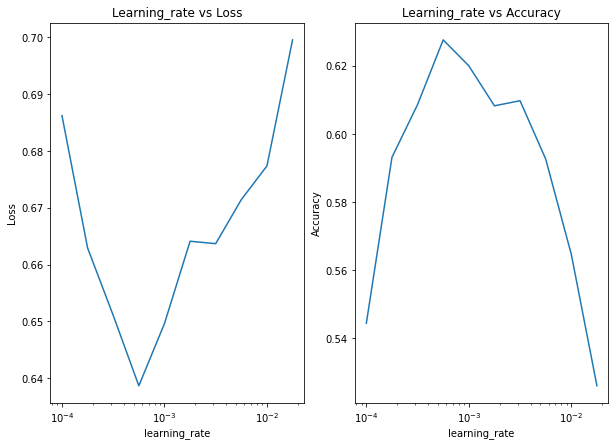

In [ ]:
# plot the learning rate vs Loss and accuracy
epoch = np.arange(10)
lr_array = 1e-4 * 10**(epoch/4)

fig, ax = plt.subplots(1,2,figsize=(10,7))
ax[0].semilogx(lr_array, history_3.history["loss"])
ax[0].set_xlabel("learning_rate")
ax[0].set_ylabel("Loss")
ax[0].set_title("Learning_rate vs Loss")

ax[1].semilogx(lr_array, history_3.history["accuracy"])
ax[1].set_xlabel("learning_rate")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Learning_rate vs Accuracy")

plt.show()

It seems our ideal learning rate is between 5e-4 and 1e-3. 
We can try to train our model with these learning rates and see if our model performs better. 

In [ ]:
# build the model with the ideal learning rate
tf.random.set_seed(42)

# create the model
model_4 = tf.keras.Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
                metrics=["accuracy"])

# fit the model
history_4 = model_4.fit(train_data_augmented,
                        epochs=8,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/8
251/251 [==============================] - 105s 415ms/step - loss: 0.6766 - accuracy: 0.5409 - val_loss: 0.6487 - val_accuracy: 0.5981
Epoch 2/8
251/251 [==============================] - 105s 418ms/step - loss: 0.6450 - accuracy: 0.6146 - val_loss: 0.6233 - val_accuracy: 0.6367
Epoch 3/8
251/251 [==============================] - 103s 411ms/step - loss: 0.6200 - accuracy: 0.6497 - val_loss: 0.5909 - val_accuracy: 0.6698
Epoch 4/8
251/251 [==============================] - 105s 416ms/step - loss: 0.6008 - accuracy: 0.6698 - val_loss: 0.5616 - val_accuracy: 0.7004
Epoch 5/8
251/251 [==============================] - 104s 415ms/step - loss: 0.5786 - accuracy: 0.6924 - val_loss: 0.5655 - val_accuracy: 0.7064
Epoch 6/8
251/251 [==============================] - 103s 409ms/step - loss: 0.5687 - accuracy: 0.6981 - val_loss: 0.5263 - val_accuracy: 0.7247
Epoch 7/8
251/251 [==============================] - 104s 414ms/step - loss: 0.5626 - accuracy: 0.7049 - val_loss: 0.5377 - val_ac

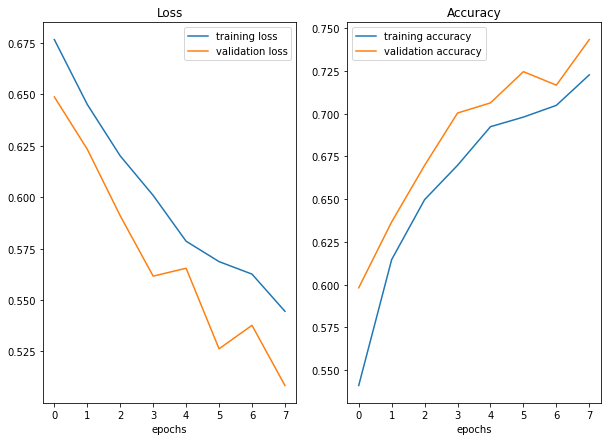

In [ ]:
# plot loss curves
plot_loss_curves(history_4)

Our training curves are looking good. The performance on the training set and the validation set are better than our previous models. Using the best learning rate improved immediately our model. 
Let's save our model.

In [ ]:
# save model 4
model_4.save('model_4.h5')

# 3. Make a prediction with our saved Model

Our model is trained so now we can try to make predictions with it. 

To really test it we need to upload a couple of our own images and see how the model goes.

In [11]:
# classes we're working with
print(class_names)

['cat', 'dog']


In [13]:
# download our example images
!wget https://raw.githubusercontent.com/danchaud-vincent/tensorflow-deep-learning/main/data/cat_example.png
!wget https://raw.githubusercontent.com/danchaud-vincent/tensorflow-deep-learning/main/data/dog_example.png

--2022-08-30 16:50:18--  https://raw.githubusercontent.com/danchaud-vincent/tensorflow-deep-learning/main/data/cat_example.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428530 (418K) [image/png]
Saving to: ‘cat_example.png.1’

cat_example.png.1   100%[===================>] 418.49K  --.-KB/s    in 0.01s   

2022-08-30 16:50:18 (34.7 MB/s) - ‘cat_example.png.1’ saved [428530/428530]

--2022-08-30 16:50:18--  https://raw.githubusercontent.com/danchaud-vincent/tensorflow-deep-learning/main/data/dog_example.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiti

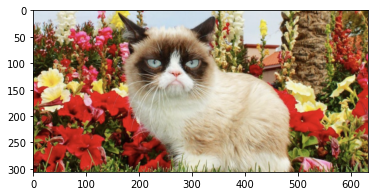

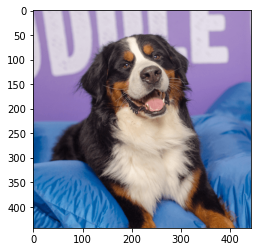

In [15]:
# view our examples
cat_img = mpimg.imread("cat_example.png")
dog_img = mpimg.imread("dog_example.png")

plt.figure(1)
plt.imshow(cat_img)
plt.show()

plt.figure(2)
plt.imshow(dog_img)
plt.show()

In [17]:
# shapes of the examples
print("Dog image shape:", dog_img.shape)
print("Cat image shape:", cat_img.shape)

Dog image shape: (443, 443, 4)
Cat image shape: (306, 633, 4)


In [28]:
# load and prep our custom images
def load_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel)

  Arguments:
  - filename (str): path of the file
  - img_shape (int): shape of the input image of our model

  Returns:
  - img (array): an array corresponding to an image ready to be use by the model
  """

  # read in target file
  img = tf.io.read_file("cat_example.png")

  # decode the read file into a tensor & ensure 3 colour channels
  img = tf.image.decode_image(img, channels=3)

  # resize the image to the same size our model was trained
  img = tf.image.resize(img, size=(224,224))

  # rescale the image
  img = img/255

  # expand dims to fit the batch size dimension
  img = tf.expand_dims(img, axis=0)

  return img

In [29]:
# Load and prep the dog image
dog_img_model = load_prep_image("dog_example.png")
dog_img_model

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.84811795, 0.88805145, 0.9304709 ],
         [0.8541842 , 0.89411765, 0.93653715],
         [0.8491711 , 0.8883868 , 0.93152404],
         ...,
         [0.44278863, 0.3344001 , 0.14187348],
         [0.32157502, 0.2496562 , 0.07911912],
         [0.30297446, 0.2046909 , 0.0643851 ]],

        [[0.8493558 , 0.89249307, 0.9336747 ],
         [0.84882706, 0.89411765, 0.93333334],
         [0.85004306, 0.89113337, 0.93333334],
         ...,
         [0.3817115 , 0.3033255 , 0.1016973 ],
         [0.30308965, 0.23755652, 0.06443869],
         [0.322741  , 0.23243453, 0.09670991]],

        [[0.84711677, 0.890254  , 0.9297734 ],
         [0.8434699 , 0.89052874, 0.9297444 ],
         [0.8456845 , 0.8883141 , 0.9297444 ],
         ...,
         [0.32754514, 0.2470571 , 0.06790848],
         [0.28085664, 0.21793635, 0.05641621],
         [0.2795256 , 0.19649847, 0.06384825]],

        ...,

        [[0.45676938, 0.09106545, 

In [30]:
# load and pred cat image
cat_image_model = load_prep_image("cat_example.png")
cat_image_model

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.84811795, 0.88805145, 0.9304709 ],
         [0.8541842 , 0.89411765, 0.93653715],
         [0.8491711 , 0.8883868 , 0.93152404],
         ...,
         [0.44278863, 0.3344001 , 0.14187348],
         [0.32157502, 0.2496562 , 0.07911912],
         [0.30297446, 0.2046909 , 0.0643851 ]],

        [[0.8493558 , 0.89249307, 0.9336747 ],
         [0.84882706, 0.89411765, 0.93333334],
         [0.85004306, 0.89113337, 0.93333334],
         ...,
         [0.3817115 , 0.3033255 , 0.1016973 ],
         [0.30308965, 0.23755652, 0.06443869],
         [0.322741  , 0.23243453, 0.09670991]],

        [[0.84711677, 0.890254  , 0.9297734 ],
         [0.8434699 , 0.89052874, 0.9297444 ],
         [0.8456845 , 0.8883141 , 0.9297444 ],
         ...,
         [0.32754514, 0.2470571 , 0.06790848],
         [0.28085664, 0.21793635, 0.05641621],
         [0.2795256 , 0.19649847, 0.06384825]],

        ...,

        [[0.45676938, 0.09106545, 